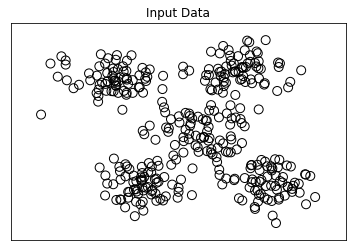

In [1]:
#K-Means is a popular method in which to cluster data. Here, we use this method to classify the given data.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import metrics

#First, observe data
X = np.loadtxt('data_clustering.txt', delimiter = ',')

plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker = 'o', facecolors = 'none', edgecolors = 'black', s = 80)
x_min, x_max = X[:, 0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:,1].max() + 1
plt.title('Input Data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

([], <a list of 0 Text major ticklabel objects>)

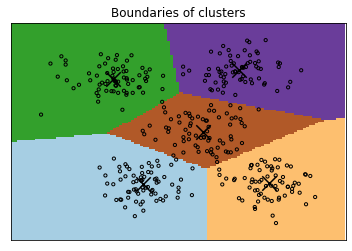

In [2]:
#We see that there are approx 5 groups, so we use k = 5
num_clusters = 5
#Init = initial position of the centroids, n_clusters = number of centroids. n_init = number times to run algorithm
#K-Means ++ gives us initial centroid locations
kmeans = KMeans(init = 'k-means++', n_clusters = num_clusters, n_init = 10)
kmeans.fit(X)

#Create grid
step_size = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:,1].max() + 1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
output = output.reshape(x_vals.shape)

#Plot the graph
plt.figure()
plt.clf()
plt.imshow(output, interpolation = 'nearest', extent = (x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()), cmap = plt.cm.Paired, aspect = 'auto', origin = 'lower')
plt.scatter(X[:, 0], X[:, 1], marker = 'o', facecolors = 'none', edgecolors = 'black', s = 10)

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker = 'x', facecolors = 'black', edgecolors = 'black', s = 210, zorder = 12, linewidths = 20)
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
